# Week 12 Tutorial

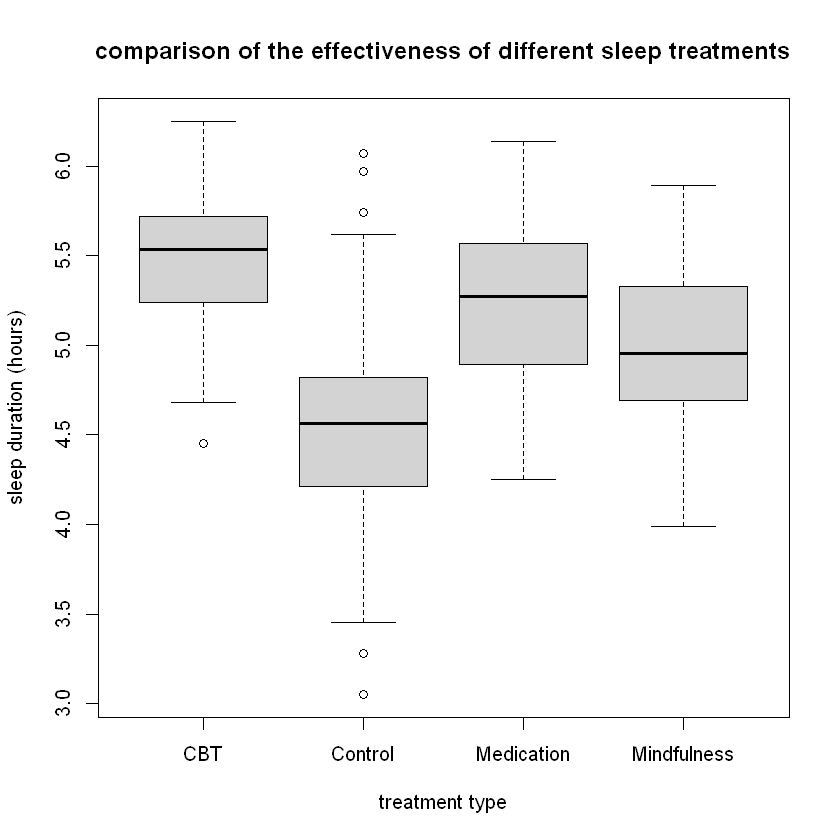

In [17]:
data = read.csv("Insomnia_data.csv", colClasses=c('factor', 'factor', 'numeric'))
treatment = data$Treatment
sleep = data$Sleep

boxplot(sleep~treatment, xlab = "treatment type", ylab="sleep duration (hours)", main = "comparison of the effectiveness of different sleep treatments")

## Question 2

Statement of Means:
- H0 : the means of all treatment types are the same
- HA : the means of the treatment types are not the same

F-test:
- H0 : F <= 1
- HA : F > 1

In [14]:
model = lm(sleep~treatment)
summary(model)


Call:
lm(formula = sleep ~ treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5034 -0.3205  0.0171  0.2881  1.5166 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.47660    0.06883  79.566  < 2e-16 ***
treatmentControl     -0.92320    0.09734  -9.484  < 2e-16 ***
treatmentMedication  -0.21820    0.09734  -2.242   0.0261 *  
treatmentMindfulness -0.47420    0.09734  -4.872 2.28e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4867 on 196 degrees of freedom
Multiple R-squared:  0.3371,	Adjusted R-squared:  0.327 
F-statistic: 33.23 on 3 and 196 DF,  p-value: < 2.2e-16


## Question 3

here intercept represents the CBT treatment, everything else is relative to the CBT treatment.

the estimated LS mean for CBT = 5.477

estimated LS for control = 5.47660 - 0.92320 = 4.553

## Question 4 

If the F-score = 1, this indicates that the variance within the individual groups is the same as the variance between the groups.

FScore is computed as group variance/ residual variance, thus for an Fscore of 1, the group variance = residual variance. 

In [15]:
AOV = aov(model)
summary(AOV)

             Df Sum Sq Mean Sq F value Pr(>F)    
treatment     3  23.61   7.871   33.23 <2e-16 ***
Residuals   196  46.43   0.237                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [16]:
# computing the critical f-score, qf(type I error, df of numerator, df denominator)
qf(0.95, 3, 196)

[1] 2.650677

## Question 5
a) the statistical conclusion is to reject H0 (F=33.23, (df_num=3, df_denom=196), a=0.05 p < 2e-16). This is because F_obs = 33.23 > F_crit = 2.651 and p << a

b)

## Question 6

In [19]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.99347, p-value = 0.5239


since p >= a, we fail to reject the null hypothesis and conclude that there is no evidence of deviation of normality. Normality holds.

In [21]:
bartlett.test(sleep~treatment)


	Bartlett test of homogeneity of variances

data:  sleep by treatment
Bartlett's K-squared = 12.148, df = 3, p-value = 0.006892


since p < a, we reject the null hypothesis, concluding that there is evidence of deviation from homoscedasticity. 

## Question 7

In [22]:
TukeyHSD(AOV)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model)

$treatment
                          diff        lwr          upr     p adj
Control-CBT            -0.9232 -1.1754324 -0.670967632 0.0000000
Medication-CBT         -0.2182 -0.4704324  0.034032368 0.1157703
Mindfulness-CBT        -0.4742 -0.7264324 -0.221967632 0.0000135
Medication-Control      0.7050  0.4527676  0.957232368 0.0000000
Mindfulness-Control     0.4490  0.1967676  0.701232368 0.0000422
Mindfulness-Medication -0.2560 -0.5082324 -0.003767632 0.0452079
